<a href="https://colab.research.google.com/github/MuhsinaPP/Deep-Learning/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras import Sequential

In [ ]:
from tensorflow.keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 13s 0us/step


In [ ]:
len(xtrain)

50000

In [ ]:
len(xtest)

10000

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
model=Sequential()

In [ ]:
model.add(Conv2D(filters=50,kernel_size=(3,3),activation='relu',input_shape=(32,32,3),padding='valid',strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=100,kernel_size=(3,3),activation='relu',padding='valid',strides=1))
model.add(Conv2D(filters=50,kernel_size=(3,3),activation='relu',padding='valid',strides=1))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(50,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 50)        1400      
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 50)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 100)       45100     
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 50)        45050     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 50)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1250)              0

In [ ]:
model.compile(optimizer=Adam(),loss=SparseCategoricalCrossentropy(),metrics=['accuracy'])

In [ ]:
hist=model.fit(xtrain,ytrain,epochs=10,batch_size=100,validation_data=(xtest,ytest))

Epoch 1/10
500/500 [==============================] - 9s 8ms/step - loss: 1.8467 - accuracy: 0.3725 - val_loss: 1.4487 - val_accuracy: 0.4728
Epoch 2/10
500/500 [==============================] - 4s 7ms/step - loss: 1.3290 - accuracy: 0.5264 - val_loss: 1.2475 - val_accuracy: 0.5555
Epoch 3/10
500/500 [==============================] - 3s 6ms/step - loss: 1.1629 - accuracy: 0.5876 - val_loss: 1.1534 - val_accuracy: 0.5892
Epoch 4/10
500/500 [==============================] - 4s 7ms/step - loss: 1.0467 - accuracy: 0.6323 - val_loss: 1.0689 - val_accuracy: 0.6231
Epoch 5/10
500/500 [==============================] - 4s 9ms/step - loss: 0.9528 - accuracy: 0.6678 - val_loss: 1.0594 - val_accuracy: 0.6339
Epoch 6/10
500/500 [==============================] - 3s 6ms/step - loss: 0.8715 - accuracy: 0.6967 - val_loss: 1.0056 - val_accuracy: 0.6508
Epoch 7/10
500/500 [==============================] - 3s 7ms/step - loss: 0.7963 - accuracy: 0.7200 - val_loss: 0.9608 - val_accuracy: 0.6742
Epoch 

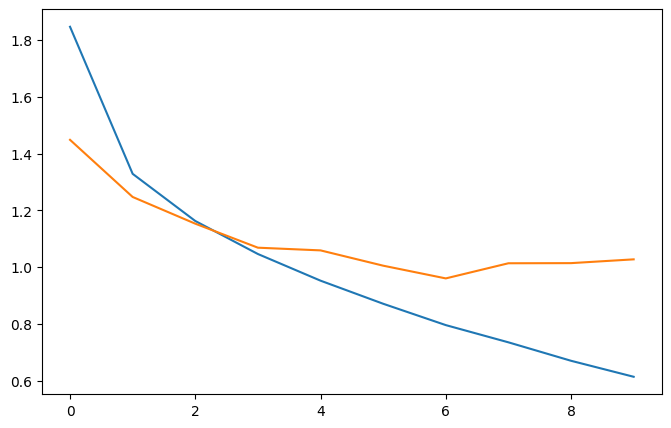

In [ ]:
pd.DataFrame(hist.history)['loss'].plot(figsize=(8,5))
pd.DataFrame(hist.history)['val_loss'].plot(figsize=(8,5))
plt.show()

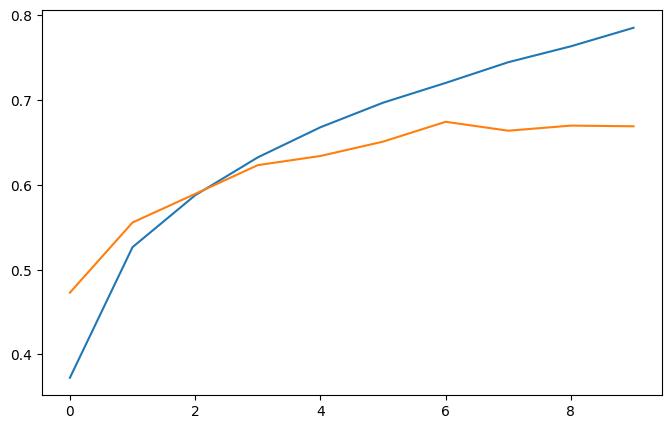

In [ ]:
pd.DataFrame(hist.history)['accuracy'].plot(figsize=(8,5))
pd.DataFrame(hist.history)['val_accuracy'].plot(figsize=(8,5))
plt.show()